In [270]:
import requests
from pathlib import Path

mpl.style.use("ggplot_updated.mplstyle")

In [20]:
file_location = Path(".", "statbel", "income_fiscal_stats.txt.zip")
txt_loc = Path(".", "statbel", "TF_PSNL_INC_TAX_MUNTY.txt")
download = requests.get("https://statbel.fgov.be/sites/default/files/files/opendata/arbeid/TF_PSNL_INC_TAX_MUNTY.zip")
open(file_location, "wb").write(download.content)

944292

In [170]:
df = pd.read_csv(txt_loc, delimiter = "|")

In [249]:
# filter REFNIS codes
income_stats = df.filter(regex = ".*_(?!(.*REFNIS$))")
# filter descriptions in French, Dutch and German
income_stats = income_stats.filter(regex = ".*_(?!((.*FR$)|(.*NL$)|(.*DE$)))")

# columns dropped
print(len(df.columns)-len(income_stats.columns))
cols = pd.Series(df.columns)
inc = pd.Series(income_stats.columns)
cols[cols.isin(inc) == False]

yearly = income_stats.groupby(["CD_YEAR"]).sum()
yearly["TAX_PERC"] = yearly.MS_TOT_TAXES / yearly.MS_TOT_NET_INC * 100
yearly.index = pd.to_datetime(yearly.index.map(str))
yearly

16


,MS_NBR_NON_ZERO_INC,MS_NBR_ZERO_INC,MS_TOT_NET_TAXABLE_INC,MS_TOT_NET_INC,MS_NBR_TOT_NET_INC,MS_REAL_ESTATE_NET_INC,MS_NBR_REAL_ESTATE_NET_INC,MS_TOT_NET_MOV_ASS_INC,MS_NBR_NET_MOV_ASS_INC,MS_TOT_NET_VARIOUS_INC,...,MS_TOT_STATE_TAXES,MS_NBR_STATE_TAXES,MS_TOT_MUNICIP_TAXES,MS_NBR_MUNICIP_TAXES,MS_TOT_SUBURBS_TAXES,MS_NBR_SUBURBS_TAXES,MS_TOT_TAXES,MS_NBR_TOT_TAXES,MS_TOT_RESIDENTS,TAX_PERC
CD_YEAR,,,,,,,,,,,,,,,,,,,,,
2005-01-01,5858996,501939,1.430865e+11,1.444387e+11,5858996,1.751864e+09,540680,3.817859e+08,48634,3.353961e+08,...,3.170290e+10,4341842,2.255259e+09,4166096,26275252.59,347595,3.398444e+10,4363524,10511382,23.528626
2006-01-01,5991864,20523691,1.494930e+11,1.512653e+11,5991864,1.804888e+09,543067,3.744401e+08,52254,3.383094e+08,...,3.297786e+10,4438077,2.356339e+09,4253205,27238625.81,358707,3.536144e+10,4460312,10584534,23.377104
2007-01-01,6077874,531896,1.560892e+11,1.583259e+11,6077874,1.789161e+09,538213,3.754681e+08,60141,3.021319e+08,...,3.435664e+10,4499035,2.485702e+09,4312629,28569508.15,365523,3.687091e+10,4529949,10666866,23.287986
2008-01-01,6143173,567543,1.641592e+11,1.668535e+11,6143173,1.834240e+09,540144,4.655816e+08,82028,3.022482e+08,...,3.618877e+10,4621942,2.627821e+09,4393879,30417254.70,372622,3.884701e+10,4659806,10753080,23.282099
2009-01-01,6159576,612171,1.683941e+11,1.715640e+11,6159576,1.915016e+09,553595,5.429365e+08,88418,3.246952e+08,...,3.566510e+10,4651899,2.629667e+09,4396694,30347783.29,370936,3.832512e+10,4696157,10839905,22.338667
2010-01-01,6213128,20664464,1.708221e+11,1.744375e+11,6213128,1.983904e+09,564925,5.209821e+08,96739,2.902853e+08,...,3.667682e+10,4755705,2.665102e+09,4452432,30546042.68,375574,3.937247e+10,4787170,10951266,22.571100
2011-01-01,6221984,575705,1.777402e+11,1.818224e+11,6221984,2.056159e+09,571640,6.096344e+08,120678,3.096514e+08,...,3.805552e+10,5023039,2.761843e+09,4497743,31872743.65,382138,4.084924e+10,5042813,11035948,22.466558
2012-01-01,6157995,541355,1.848139e+11,1.888634e+11,6157995,2.117977e+09,580253,1.647435e+09,187345,3.004062e+08,...,4.003737e+10,5019234,2.893450e+09,4510440,32933184.84,380720,4.296375e+10,5038695,11099554,22.748582
2013-01-01,6193498,556497,1.897677e+11,1.942039e+11,6193498,2.368739e+09,676871,9.553170e+08,168400,2.882633e+08,...,4.142883e+10,5032497,3.027804e+09,4537331,33985393.71,382026,4.449062e+10,5051986,11150516,22.909229


21


<Figure size 864x720 with 0 Axes>

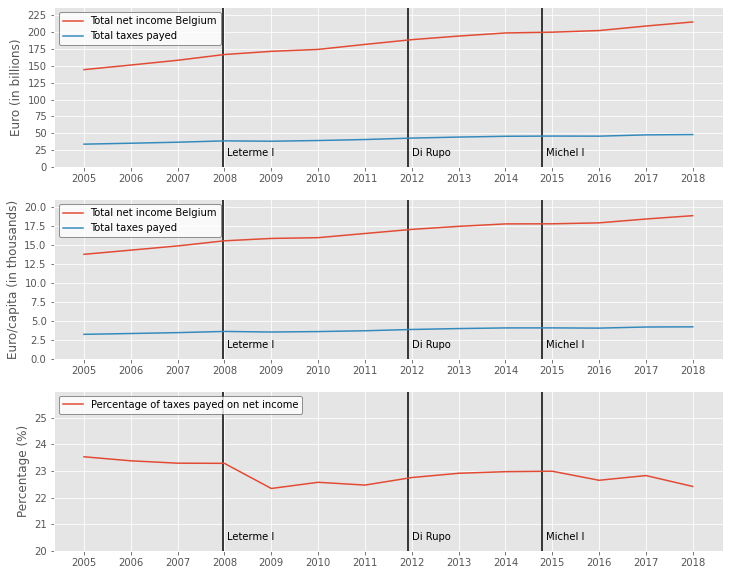

In [272]:
plt.clf()
fig, [ax, ax2, ax3] = plt.subplots(3, 1)
# cols = {"Total net income Belgium": "MS_TOT_NET_INC", "Total taxable net income Belgium": "MS_TOT_NET_TAXABLE_INC", "Total taxes payed": "MS_TOT_TAXES"}
cols = {"Total net income Belgium": "MS_TOT_NET_INC", "Total taxes payed": "MS_TOT_TAXES"}
for k, v in cols.items():
    ax.plot(yearly.index, yearly[v]/1e9, label = k)
max_val = round(max([yearly[x].max() for x in cols.values()]) / 1e9 * 1.1)
ax.set_ylim([0, max_val])
ax.set_ylabel("Euro (in billions)")
ax.set_yticks(range(0,max_val,25))

for k, v in cols.items():
    ax2.plot(yearly.index, yearly[v]/yearly.MS_TOT_RESIDENTS/1e3, label = k)
max_val = round(max([(yearly[x]/yearly.MS_TOT_RESIDENTS).max() for x in cols.values()]) / 1e3 * 1.1)
print(max_val)
ax2.set_ylabel("Euro/capita (in thousands)")
ax2.set_ylim([0, max_val])
ax2.set_yticks(np.array(range(0,max_val*2,5))/2)

ax3.plot(yearly.index, yearly.TAX_PERC, label = "Percentage of taxes payed on net income")
ax3.set_ylabel("Percentage (%)")
min_val = round(yearly.TAX_PERC.min() * 0.9)
max_val = round(yearly.TAX_PERC.max() * 1.1)
ax3.set_ylim([min_val, max_val])
ax3.set_yticks(np.array(range(min_val,max_val,1)))


formatter = mpl.dates.DateFormatter("%Y")
for ax in fig.get_axes():
    ax.set_xticks(yearly.index)
    ax.xaxis.set_major_formatter(formatter)
    ax.legend(loc = "upper left")
    lims = ax.viewLim.get_points()
    ax.vlines("2007-12-21", lims[0][1], lims[1][1], color = "black")
    ax.annotate("Leterme I", ("2008-01-21", lims[0][1] + (lims[1][1] - lims[0][1])/15))
    ax.vlines("2011-12-06", lims[0][1], lims[1][1], color = "black")
    ax.annotate("Di Rupo", ("2012-01-06", lims[0][1] + (lims[1][1] - lims[0][1])/15))
    ax.vlines("2014-10-11", lims[0][1], lims[1][1], color = "black")
    ax.annotate("Michel I", ("2014-11-11", lims[0][1] + (lims[1][1] - lims[0][1])/15))